In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

### ex. 0: Simulate phone dataset

part A

In [2]:
np.random.seed(42)
minutes_month = np.random.normal(loc = 100, scale = 100, size = 400)
minutes_month = [np.abs(i) for i in minutes_month]
#noise_values = np.random.normal(loc = 0, scale = 50, size = 400)

cost_function = lambda x: 2*x + 25 + np.random.normal(loc = 0, scale = 50)

cost_per_month = [cost_function(x) for x in minutes_month]
cost_per_month

[244.62144766252817,
 167.37838861807444,
 354.7998926060476,
 531.9550009698422,
 155.66605148137063,
 209.31510522753882,
 487.46154163234854,
 371.3679715795171,
 137.11990439860452,
 359.2339504201304,
 167.89720534195203,
 75.62194469405517,
 196.6867457764257,
 271.539890026485,
 186.59926710158612,
 75.11816732397777,
 105.1238228430109,
 293.6331982336977,
 102.36004409894913,
 110.83666433756372,
 621.1671500284102,
 267.6117820248531,
 226.05743351363108,
 158.52818479040914,
 148.39225257422086,
 315.6160958185907,
 6.952542455455344,
 334.4421766690563,
 157.79348635871838,
 78.72427572018894,
 45.495751920831864,
 493.49402801378255,
 208.83021333018533,
 72.41929858097818,
 464.6268350254392,
 72.87346901519321,
 348.20349627951566,
 147.92895186521054,
 5.468087811928356,
 261.59486222899375,
 391.8965884460474,
 257.63891883328944,
 98.49823852035807,
 160.32325890650282,
 55.48092304824283,
 114.51478576256021,
 151.20215811288492,
 389.4304559274153,
 268.030312046857

* Установка "seed" в 42 означает установку начального значения (seed) для генератора случайных чисел равным 42. 

<Axes: >

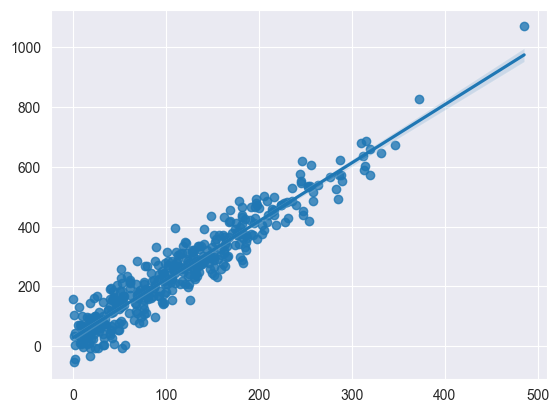

In [3]:
sns.regplot (x = minutes_month, y = cost_per_month)

part B

In [4]:
costs = {x: cost_function(x) for x in minutes_month
                          if x <= 300}

costs



{149.67141530112326: 371.2570209010464,
 86.17356988288154: 171.5449033548944,
 164.76885381006923: 359.34374646718766,
 252.30298564080255: 506.492206846353,
 76.58466252766641: 156.44451368371705,
 76.58630430508194: 162.7140024367319,
 257.92128155073914: 551.9492516831639,
 176.74347291529088: 354.5495147474079,
 53.052561406504786: 193.89292909168563,
 154.25600435859647: 288.78164360621776,
 53.65823071875377: 122.97287922943958,
 53.42702464297432: 109.86749637223988,
 124.19622715660341: 345.74134853089345,
 91.32802446577978: 217.4837877571383,
 72.49178325130327: 221.57579347603829,
 43.77124707590273: 38.26447549995686,
 1.2831120334423787: 40.9187373603477,
 131.4247332595274: 332.33100630022665,
 9.197592447878904: 47.509384359529015,
 41.230370133529135: 160.73475902032584,
 246.5648768921554: 492.26533127929224,
 77.42236995134644: 250.31211191197187,
 106.75282046879238: 353.45054711854726,
 42.47481862134569: 91.80770922070843,
 45.56172754748174: 93.84832902492488,
 1

In [5]:
df = pd.DataFrame(columns = ['Minutes', 'Cost per month'])
df['Minutes'] = costs.keys()
df["Cost per month"] = costs.values()
df.head()



,Minutes,Cost per month
0,149.671415,371.257021
1,86.173570,171.544903
2,164.768854,359.343746
3,252.302986,506.492207
4,76.584663,156.444514


In [6]:
for x in df.index:
    if df.loc[x, 'Cost per month'] < 0:
        df.drop(x, inplace = True)

df.describe()

,Minutes,Cost per month
count,379.000000,379.000000
mean,111.131231,256.415541
std,70.509608,139.356507
min,0.601738,9.700766
25%,50.262101,146.249900
50%,106.752820,246.993525
75%,161.571070,356.416292
max,289.679298,676.364457


In [48]:
def ground_truth(n):
    rand_x = np.linspace(0, n)
    f = lambda val: 2*val + 25
    ground_y = [f(x) for x in rand_x]
    return rand_x, ground_y

line_x, line_y = ground_truth(300)

<Axes: xlabel='Minutes', ylabel='Cost per month'>

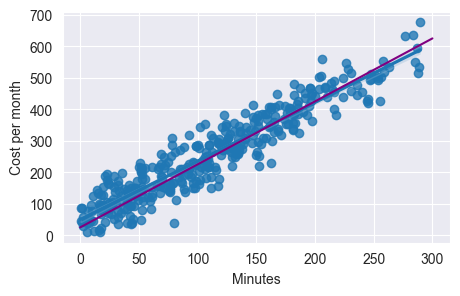

In [49]:
fig, ax = plt.figure(figsize = (5,3), dpi = 100), plt.axes()
sns.regplot(df, x= 'Minutes', y = 'Cost per month')
sns.lineplot (x = line_x, y = line_y, color = "purple") #plotting "ground truth"

### ex. 1 Train / Test split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = np.array(df['Minutes']).reshape(-1, 1)
y = np.array(df['Cost per month']).reshape(-1, 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
y_test[:5]

array([[343.03822408],
       [383.9923608 ],
       [111.40353316],
       [249.80153115],
       [ 15.5387167 ]])

### 2. Simple linear regression with normal equation

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model_SVD = LinearRegression()
model_SVD.fit(X_train, y_train)
b0 = model_SVD.intercept_
b1 = model_SVD.coef_
print (f"Parameters: {b1}")
print(f"Intercept: {b0}")

Parameters: [[1.83080587]]
Intercept: [52.24705548]


In [42]:
y_predicted = model_SVD.predict(X_train)

In [54]:
n = X_train.max()
ground_x, ground_y = ground_truth(n)

In [29]:
X_train[:, 0]

array([ 53.08243479, 181.3509636 , 104.55718399, 162.96288419,
        92.28982906,  23.26524371,   9.06125452,  43.58621512,
       195.40017635,  41.23037013,   1.8491349 ,  78.03281122,
       209.8776852 ,   9.19759245, 118.46338585, 111.73273833,
        95.96701239,  79.18777496,  29.23305344,  92.71710873,
        51.48472247,  52.08257622, 106.02302099, 184.9602097 ,
       257.92128155, 158.83172065, 107.58045582,  53.65823072,
       148.24724152,  83.87142883, 247.78940447,  84.006147  ,
       224.12673401, 187.23206367,  37.7669368 , 147.38329209,
       286.57745111, 109.70775493,   7.08924981, 134.64482095,
       108.18741394,  67.23378534, 136.13956055,   0.94636749,
       126.10552722,  32.04566131,  43.98189598, 100.51134566,
        68.97332434,  35.48802454,  42.47481862,  32.81860489,
       152.19415656, 158.68570938, 136.1636025 , 226.69111492,
        76.31813933, 215.81108735, 230.54788072, 205.3802052 ,
       109.96513651, 125.04928503,  17.77796044, 132.87

<Axes: >

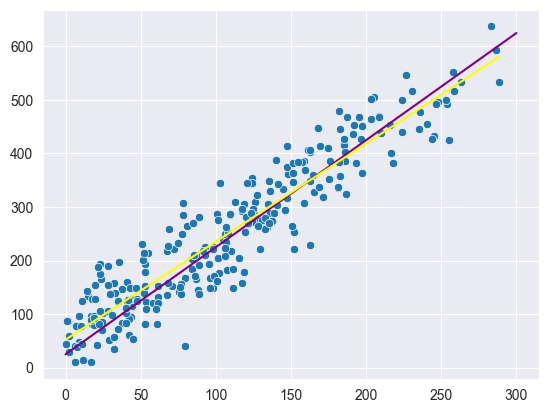

In [55]:
fig, ax = plt.figure(), plt.axes()
sns.scatterplot(x = X_train[:,0], y = y_train[:,0])
sns.lineplot(x=line_x, y=line_y, color = "purple")
sns.lineplot(x = X_train[:,0], y = y_predicted[:,0], color = "yellow")
